In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sea

import warnings
warnings.filterwarnings('ignore')

In [5]:
data = pd.read_csv('/Users/ankusmanish/Desktop/Training/Datasets/Week 6 data/bank.csv', sep = ';')

In [6]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
age          4521 non-null int64
job          4521 non-null object
marital      4521 non-null object
education    4521 non-null object
default      4521 non-null object
balance      4521 non-null int64
housing      4521 non-null object
loan         4521 non-null object
contact      4521 non-null object
day          4521 non-null int64
month        4521 non-null object
duration     4521 non-null int64
campaign     4521 non-null int64
pdays        4521 non-null int64
previous     4521 non-null int64
poutcome     4521 non-null object
y            4521 non-null object
dtypes: int64(7), object(10)
memory usage: 600.5+ KB


In [8]:
lis = []
cols = data.columns
for i in cols:
    if data[i].dtype == 'O':
        lis.append(i)

In [9]:
#The list of columns that has categorical values
print(lis)

['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'y']


In [10]:
for i in lis:
    print(i.upper())
    print(data[i].value_counts())
    print('-'*100)
    print('-'*100)

JOB
management       969
blue-collar      946
technician       768
admin.           478
services         417
retired          230
self-employed    183
entrepreneur     168
unemployed       128
housemaid        112
student           84
unknown           38
Name: job, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
MARITAL
married     2797
single      1196
divorced     528
Name: marital, dtype: int64
----------------------------------------------------------------------------------------------------
----------------------------------------------------------------------------------------------------
EDUCATION
secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64
----------------------------------------------------------------------------------------------------
----------------

In [11]:
outcome = data['y']

In [12]:
data.drop(['job','default','housing','loan','month','poutcome','contact','day','marital','education','y'], axis = 1, inplace = True)

In [13]:
data.head()

,age,balance,duration,campaign,pdays,previous
0,30,1787,79,1,-1,0
1,33,4789,220,1,339,4
2,35,1350,185,1,330,1
3,30,1476,199,4,-1,0
4,59,0,226,1,-1,0


In [14]:
outcome = pd.DataFrame(outcome, columns = ['y'])

In [15]:
outcome.head()

,y
0,no
1,no
2,no
3,no
4,no


In [16]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

In [17]:
dat = lb.fit_transform(outcome)

In [18]:
outcome = pd.DataFrame(dat, columns = ['y'])

In [19]:
outcome['y'].value_counts()

0    4000
1     521
Name: y, dtype: int64

In [20]:
mod_data = pd.concat([data, outcome], axis = 1)

In [21]:
mod_data.head()

,age,balance,duration,campaign,pdays,previous,y
0,30,1787,79,1,-1,0,0
1,33,4789,220,1,339,4,0
2,35,1350,185,1,330,1,0
3,30,1476,199,4,-1,0,0
4,59,0,226,1,-1,0,0


In [22]:
mod_data.columns

Index(['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'], dtype='object')

In [23]:
data = pd.DataFrame(mod_data, columns = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'y'])

In [24]:
data.head()

,age,balance,duration,campaign,pdays,previous,y
0,30,1787,79,1,-1,0,0
1,33,4789,220,1,339,4,0
2,35,1350,185,1,330,1,0
3,30,1476,199,4,-1,0,0
4,59,0,226,1,-1,0,0


In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
sc = StandardScaler()

In [27]:
scaled_data = data.copy()

In [28]:
col_names = ['age', 'balance', 'duration', 'pdays']
features = scaled_data[col_names]
sc = StandardScaler()
scaled_features = sc.fit_transform(features.values)

In [29]:
scaled_features.shape

(4521, 4)

In [30]:
scaled_data[col_names] = scaled_features
data = scaled_data
data.head()

,age,balance,duration,campaign,pdays,previous,y
0,-1.056270,0.121072,-0.711861,1,-0.407218,0,0
1,-0.772583,1.118644,-0.169194,1,2.989044,4,0
2,-0.583458,-0.024144,-0.303898,1,2.899143,1,0
3,-1.056270,0.017726,-0.250017,4,-0.407218,0,0
4,1.686036,-0.472753,-0.146102,1,-0.407218,0,0


In [65]:
X_train, y_train, X_test, y_test = (data.iloc[:4000,:6], data.iloc[:4000,6:7], data.iloc[4000:,:6], data.iloc[4000:,6:7])




In [66]:
X_train.shape

(4000, 6)

In [67]:
X_train = X_train.T.values
y_train = y_train.T.values
X_test = X_test.T.values
y_test = y_test.T.values

# Implementing one layer neural network

In [68]:
def sigmoid(Z):
    A = 1 / (1 + (np.exp(-Z)))
    
    return A

In [69]:
def initialize_with_zeros(dim):
    w = np.zeros((dim,1))
    b = 0
    
    return w,b

In [70]:
def propagate(w, b, X, Y):
    
    m = X.shape[1]
    
    # forward propogation
    A = sigmoid(np.dot(w.T, X) + b) 
    cost = (- 1 / m) * np.sum(Y * np.log(A) + (1 - Y) * (np.log(1 - A)))  
    
    
    # backward propogation
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)    
    
    grads = {
        'dw' : dw,
        'db' : db
    }
    
    return grads, cost

In [71]:
def optimize(w, b, X, Y, num_iterations, learning_rate):
    
    costs = []
    
    for i in range(num_iterations):
        # Cost and gradient calculation 
        grads, cost = propagate(w, b, X, Y)
        
        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]
        
        # update parameters
        w = w - learning_rate * dw  
        b = b - learning_rate * db
        
        costs.append(cost)
        
    params = {"w": w,
              "b": b}
    
    grads = {"dw": dw,
             "db": db}
    
    return params, grads, costs        

In [82]:
def model(X_train, Y_train, X_test, Y_test, num_iterations, learning_rate):
    
    w, b = initialize_with_zeros(X_train.shape[0])
    
    params, grads, costs  = optimize(w, b, X_train, Y_train, num_iterations, learning_rate)
    
    w = params["w"]
    b = params["b"]
        
    d = {"costs": costs,
         "w" : w, 
         "b" : b}
    
    return d     

In [120]:
d = model(X_train, y_train, X_test, y_test, num_iterations = 20000, learning_rate = 0.001)



In [121]:
for i in d['costs']:
    print(i)

0.6931471805599454
0.6916871421778742
0.690239617632001
0.6888044930910141
0.6873816535231603
0.6859709828130914
0.6845723638801056
0.6831856787970926
0.6818108089095167
0.6804476349537877
0.6790960371744055
0.6777558954392989
0.6764270893528256
0.6751094983659466
0.6738030018831443
0.6725074793657024
0.6712228104310252
0.669948874947725
0.6686855531262659
0.6674327256049928
0.6661902735314381
0.6649580786388328
0.6637360233177942
0.6625239906832047
0.6613218646363256
0.6601295299222208
0.6589468721825941
0.6577737780041626
0.6566101349627108
0.65545583166298
0.6543107577745633
0.6531748040639834
0.6520478624231367
0.6509298258942899
0.6498205886918154
0.648720046220856
0.6476280950931012
0.6465446331398569
0.6454695594225887
0.6444027742411054
0.6433441791395533
0.6422936769103768
0.6412511715963988
0.6402165684911671
0.6391897741377004
0.6381706963257692
0.6371592440878303
0.6361553276937337
0.635158858644309
0.6341697496639331
0.6331879146921776
0.6322132688746208
0.6312457285529107

0.3749965784103908
0.37497907395577
0.3749615803193581
0.37494409748816504
0.37492662544922245
0.3749091641895846
0.37489171369632723
0.3748742739565483
0.37485684495736793
0.37483942668592785
0.3748220191293917
0.37480462227494515
0.37478723610979525
0.37476986062117124
0.37475249579632375
0.37473514162252486
0.3747177980870687
0.3747004651772705
0.37468314288046745
0.37466583118401775
0.37464853007530113
0.37463123954171895
0.37461395957069366
0.37459669014966873
0.3745794312661093
0.37456218290750176
0.3745449450613531
0.3745277177151918
0.37451050085656734
0.37449329447305024
0.37447609855223196
0.37445891308172474
0.374441738049162
0.37442457344219765
0.37440741924850657
0.3743902754557846
0.3743731420517479
0.3743560190241335
0.3743389063606991
0.37432180404922294
0.37430471207750365
0.3742876304333606
0.3742705591046334
0.37425349807918223
0.37423644734488765
0.37421940688965033
0.3742023767013915
0.37418535676805237
0.3741683470775947
0.374151347618
0.3741343583772703
0.3741173

0.35477817456887706
0.35476969376767103
0.35476121561334756
0.35475274010437347
0.3547442672392173
0.35473579701634894
0.35472732943423974
0.354718864491362
0.35471040218618977
0.35470194251719867
0.35469348548286517
0.35468503108166755
0.35467657931208524
0.35466813017259924
0.35465968366169165
0.3546512397778462
0.35464279851954766
0.35463435988528286
0.354625923873539
0.3546174904828055
0.3546090597115726
0.3546006315583323
0.3545922060215777
0.3545837830998032
0.3545753627915049
0.3545669450951799
0.3545585300093269
0.3545501175324457
0.35454170766303766
0.35453330039960534
0.3545248957406528
0.3545164936846853
0.3545080942302096
0.35449969737573367
0.3544913031197668
0.35448291146081967
0.3544745223974044
0.35446613592803417
0.3544577520512238
0.3544493707654892
0.3544409920693478
0.35443261596131825
0.3544242424399205
0.35441587150367587
0.35440750315110703
0.3543991373807379
0.35439077419109377
0.35438241358070127
0.35437405554808826
0.3543657000917839
0.3543573472103189
0.35434

0.33992871616962145
0.33992395900360134
0.33991920277942744
0.3399144474967715
0.33990969315530534
0.3399049397547008
0.3399001872946301
0.3398954357747656
0.3398906851947796
0.3398859355543449
0.3398811868531342
0.3398764390908203
0.3398716922670766
0.3398669463815761
0.3398622014339925
0.33985745742399903
0.3398527143512697
0.3398479722154784
0.3398432310162991
0.33983849075340616
0.33983375142647376
0.33982901303517676
0.3398242755791896
0.33981953905818724
0.3398148034718448
0.3398100688198373
0.33980533510184024
0.33980060231752907
0.33979587046657944
0.3397911395486672
0.3397864095634684
0.3397816805106591
0.3397769523899156
0.33977222520091444
0.33976749894333225
0.3397627736168457
0.33975804922113195
0.3397533257558678
0.33974860322073075
0.3397438816153981
0.33973916093954754
0.33973444119285673
0.3397297223750035
0.33972500448566595
0.3397202875245223
0.339715571491251
0.3397108563855304
0.3397061422070393
0.3397014289554566
0.3396967166304611
0.33969200523173204
0.3396872947

0.3320602406390911
0.332056855814891
0.33205347150445114
0.3320500877076301
0.3320467044242867
0.33204332165428
0.33203993939746873
0.332036557653712
0.3320331764228688
0.3320297957047982
0.3320264154993594
0.33202303580641157
0.33201965662581395
0.33201627795742583
0.3320128998011066
0.3320095221567156
0.3320061450241124
0.33200276840315646
0.33199939229370734
0.3319960166956247
0.3319926416087682
0.3319892670329974
0.3319858929681725
0.3319825194141529
0.3319791463707987
0.3319757738379698
0.3319724018155262
0.33196903030332786
0.33196565930123495
0.3319622888091077
0.33195891882680617
0.3319555493541907
0.3319521803911216
0.3319488119374593
0.3319454439930639
0.3319420765577963
0.3319387096315167
0.33193534321408585
0.3319319773053642
0.3319286119052126
0.33192524701349174
0.33192188263006234
0.3319185187547853
0.3319151553875215
0.33191179252813174
0.33190843017647725
0.3319050683324189
0.3319017069958178
0.3318983461665352
0.3318949858444322
0.33189162602937006
0.33188826672121013

0.3262551103528552
0.3262525163791251
0.32624992271967285
0.3262473293744267
0.32624473634331475
0.3262421436262654
0.32623955122320697
0.32623695913406775
0.3262343673587759
0.32623177589725993
0.3262291847494481
0.326226593915269
0.32622400339465085
0.3262214131875221
0.3262188232938114
0.3262162337134471
0.32621364444635764
0.3262110554924717
0.32620846685171784
0.32620587852402455
0.32620329050932045
0.3262007028075341
0.3261981154185943
0.3261955283424296
0.3261929415789688
0.32619035512814043
0.32618776898987334
0.3261851831640964
0.32618259765073815
0.32618001244972755
0.32617742756099344
0.3261748429844646
0.32617225872006994
0.3261696747677383
0.32616709112739867
0.32616450779897993
0.3261619247824111
0.32615934207762104
0.3261567596845389
0.3261541776030937
0.32615159583321435
0.32614901437483
0.32614643322786985
0.3261438523922629
0.3261412718679383
0.32613869165482523
0.3261361117528529
0.32613353216195046
0.3261309528820472
0.32612837391307226
0.32612579525495505
0.3261232

0.3206437813609057
0.3206417918002552
0.32063980242850737
0.32063781324562723
0.32063582425158005
0.320633835446331
0.32063184682984514
0.32062985840208785
0.32062787016302413
0.32062588211261944
0.3206238942508388
0.32062190657764755
0.32061991909301085
0.320617931796894
0.3206159446892624
0.32061395777008106
0.32061197103931544
0.3206099844969309
0.3206079981428925
0.32060601197716576
0.3206040259997159
0.32060204021050825
0.3206000546095082
0.32059806919668105
0.32059608397199213
0.3205940989354069
0.32059211408689076
0.32059012942640897
0.320588144953927
0.3205861606694102
0.32058417657282406
0.3205821926641339
0.32058020894330536
0.3205782254103036
0.3205762420650942
0.32057425890764274
0.32057227593791454
0.32057029315587504
0.32056831056148993
0.3205663281547246
0.32056434593554445
0.32056236390391507
0.32056038205980203
0.3205584004031709
0.32055641893398706
0.32055443765221625
0.320552456557824
0.3205504756507757
0.3205484949310371
0.3205465143985738
0.3205445340533513
0.32054

0.3154536416650647
0.3154520916597085
0.31545054177110543
0.31544899199923876
0.315447442344092
0.31544589280564855
0.3154443433838919
0.31544279407880543
0.3154412448903727
0.315439695818577
0.31543814686340194
0.3154365980248308
0.3154350493028473
0.31543350069743475
0.3154319522085766
0.31543040383625637
0.3154288555804576
0.31542730744116365
0.31542575941835815
0.31542421151202443
0.3154226637221461
0.3154211160487067
0.3154195684916896
0.3154180210510784
0.3154164737268566
0.31541492651900777
0.3154133794275153
0.31541183245236265
0.3154102855935336
0.3154087388510116
0.31540719222478003
0.31540564571482266
0.3154040993211228
0.31540255304366405
0.3154010068824301
0.3153994608374045
0.3153979149085706
0.3153963690959121
0.3153948233994126
0.3153932778190556
0.31539173235482465
0.3153901870067034
0.31538864177467535
0.3153870966587242
0.3153855516588335
0.3153840067749867
0.3153824620071676
0.31538091735535967
0.31537937281954653
0.31537782839971185
0.3153762840958392
0.31537473990

0.3124880512842644
0.3124867114460147
0.31248537169720747
0.3124840320378322
0.31248269246787835
0.3124813529873354
0.31248001359619276
0.3124786742944401
0.31247733508206677
0.3124759959590623
0.3124746569254162
0.3124733179811179
0.31247197912615704
0.31247064036052297
0.3124693016842052
0.31246796309719344
0.31246662459947705
0.3124652861910454
0.31246394787188825
0.31246260964199496
0.3124612715013551
0.31245993344995826
0.31245859548779387
0.31245725761485144
0.3124559198311205
0.31245458213659066
0.31245324453125134
0.31245190701509223
0.3124505695881027
0.3124492322502724
0.3124478950015907
0.31244655784204733
0.3124452207716317
0.31244388379033367
0.3124425468981423
0.3124412100950475
0.3124398733810386
0.3124385367561053
0.3124372002202372
0.31243586377342364
0.3124345274156543
0.3124331911469189
0.3124318549672067
0.3124305188765075
0.3124291828748108
0.3124278469621062
0.31242651113838316
0.31242517540363135
0.31242383975784044
0.3124225042009998
0.31242116873309916
0.312419

In [122]:
num_iterations = range(20000)

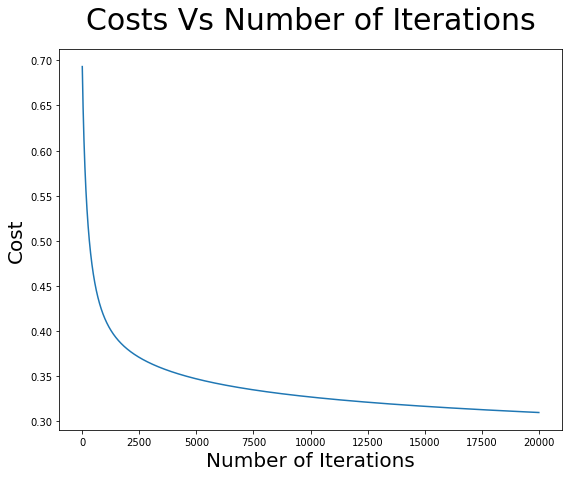

In [123]:
plt.figure(figsize = (9,7))
plt.plot(num_iterations, d['costs'])
plt.xlabel('Number of Iterations', fontsize = 20)
plt.ylabel('Cost', fontsize = 20)
plt.title('Costs Vs Number of Iterations', fontsize = 30, pad = 20)
plt.show()

In [124]:
w = d['w']
b = d['b']

In [125]:
def predict(w, b, test):
    val = sigmoid(np.dot(w.T, test) + b)
    pred = np.round(val)
    return pred

In [126]:
y_pred = predict(w,b,X_test)

In [127]:
y_pred = y_pred.astype('int')

In [128]:
def accuracy(y_test, y_pred):
    true = 0
    false = 0
    for i in range(len(y_test[0])):
        if y_test[0][i] == y_pred[0][i]:
            true += 1
        else:
            false += 1

    accuracy = true * 100 / (true + false)       
    return accuracy

In [129]:
accuracy(y_test, y_pred)

88.29174664107485